In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


In [3]:
# Load the data
df = pd.read_csv(r'C:\Users\Jairo\OneDrive\Documentos\ME_BreastCancer\data\processed\data_preprocessed.csv')
df.head()

,target,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Split the data into X and y
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# base estimator
base_estimator = LogisticRegression(max_iter=10000, random_state=42)

In [6]:
# instantiate the bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

In [7]:
# train the bagging classifier
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000,
                                                    random_state=42),
                  n_estimators=100, random_state=42)

In [8]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

# evaluate the bagging classifier
y_pred = bagging.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.956140350877193
0.9397590361445783


In [9]:
# bagging classifier for random forest
from sklearn.ensemble import RandomForestClassifier

# base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
# instantiate the bagging classifier
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
# train the bagging classifier
bagging.fit(X_train, y_train)
# evaluate the bagging classifier
y_pred = bagging.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.956140350877193
0.9397590361445783


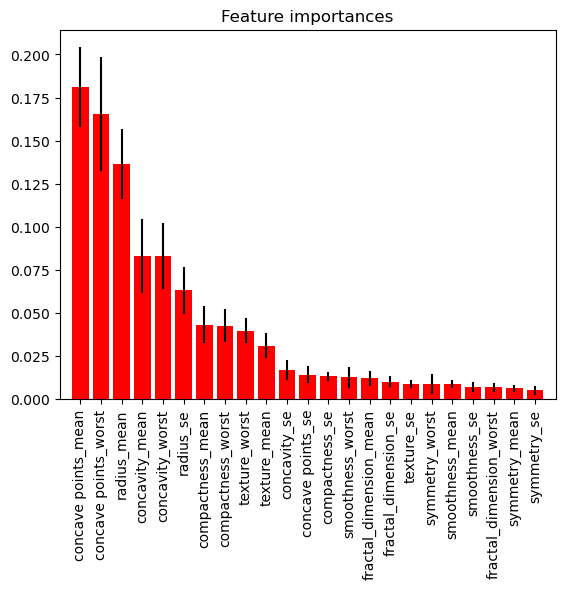

In [16]:
# feature importance
import matplotlib.pyplot as plt
import numpy as np

# get feature importance
importances = bagging.estimators_[0].feature_importances_
std = np.std([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# plot feature importance with feature names
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()





In [10]:
# import the libraries for gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
# import the libraries for AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# instantiate the gradient boosting classifier
gboos= GradientBoostingClassifier(n_estimators=100, random_state=42)
# train the gradient boosting classifier
gboos.fit(X_train, y_train)
# evaluate the gradient boosting classifier
y_pred = gboos.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))




Accuracy:  0.956140350877193
0.9411764705882352


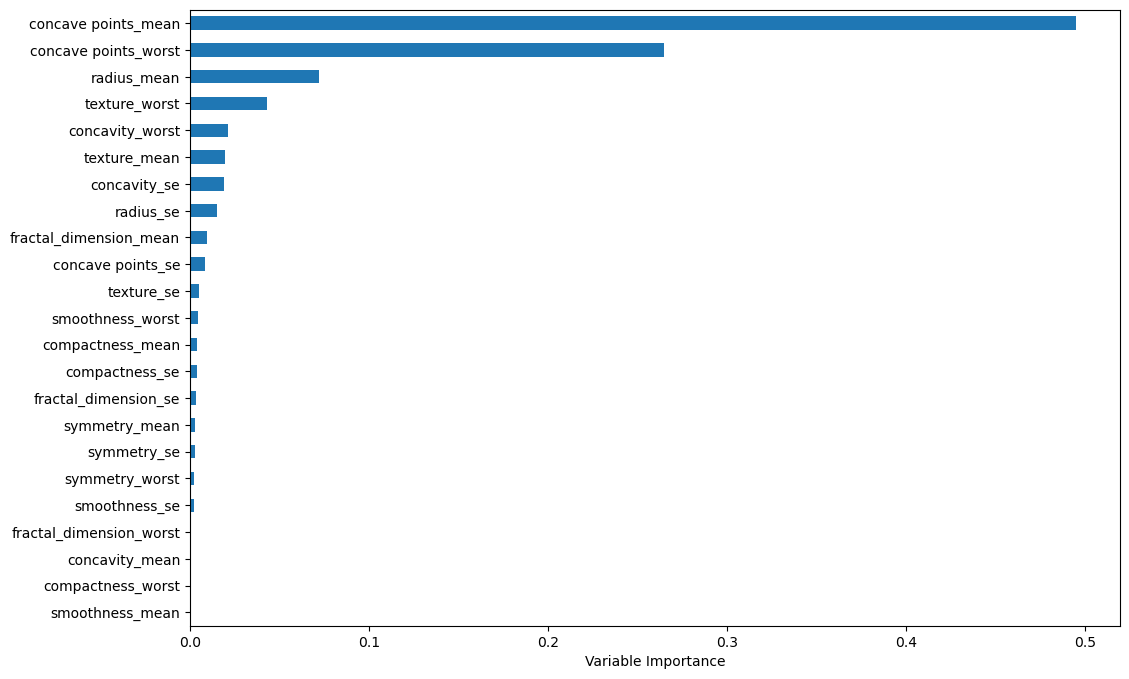

In [14]:
import matplotlib.pyplot as plt
# get the feature importance
feature_importance = gboos.feature_importances_
# convert the feature importance into a dataframe
relative_importance = pd.DataFrame(index=X_train.columns, data=feature_importance, columns=['importance'])
# sort the values
relative_importance.sort_values(by='importance', ascending=False)
# plot the relative importance
relative_importance.sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(12,8))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()


In [11]:
# instantiate the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
# train the AdaBoost classifier
adaboost.fit(X_train, y_train)
# evaluate the AdaBoost classifier
y_pred = adaboost.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.956140350877193
0.9397590361445783


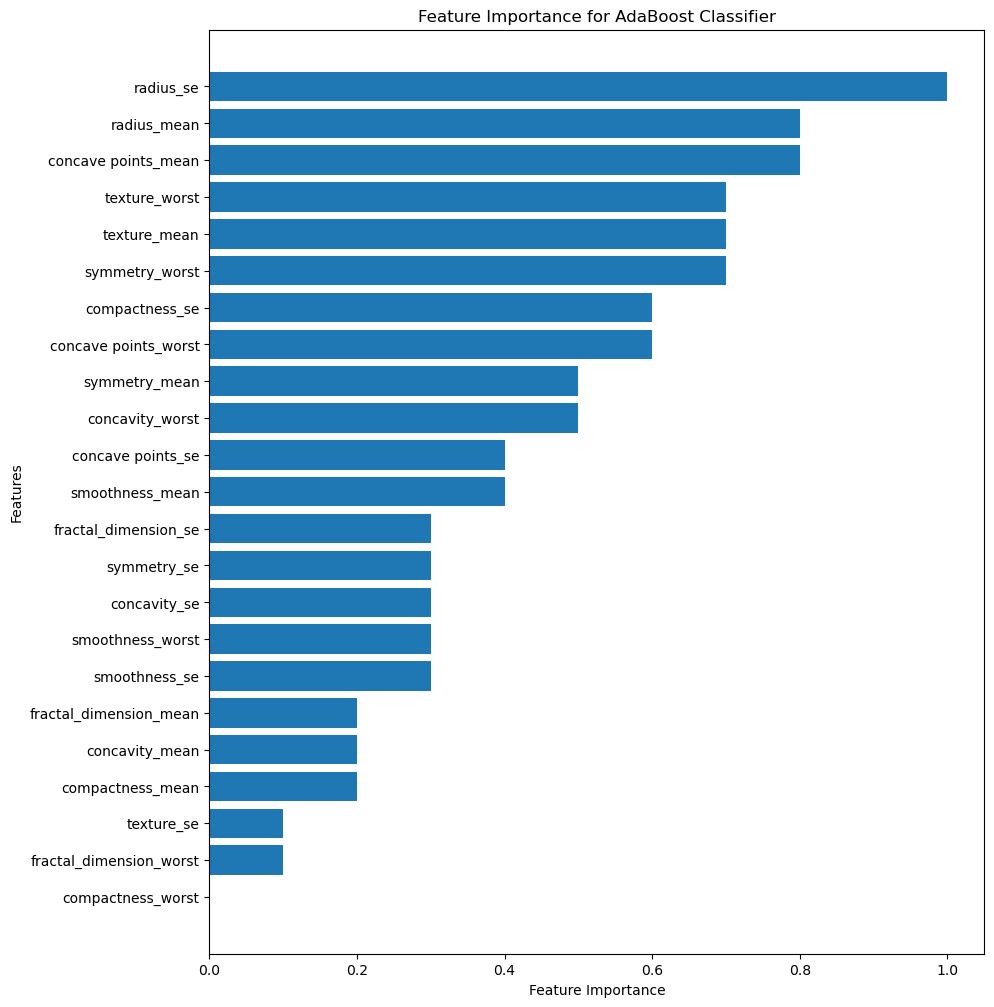

In [12]:
# feature importance for adaboost classifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# get the feature importance
feature_importance = adaboost.feature_importances_
# normalize the feature importance
feature_importance = feature_importance / feature_importance.max()
# sort the values in descending order
sorted_idx = np.argsort(feature_importance)
# get the list of features
features = X.columns
# plot
plt.figure(figsize=(10, 12))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for AdaBoost Classifier')
plt.show()


In [17]:
# hyperparameter tuning for random forest classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)
# hyperparameter space
params = {'n_estimators':[50, 100, 200],
          'max_depth':[3, 5, 7, 9],
          'max_features':[0.3, 0.5, 0.7, 0.9],
          'min_samples_leaf':[1, 3, 5, 7]}
# instantiate the grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
# train the grid search
grid_search_rf.fit(X_train, y_train)
# best estimator
grid_search_rf.best_estimator_
# evaluate the best estimator
y_pred = grid_search_rf.best_estimator_.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.9473684210526315
0.9285714285714286


In [18]:
# hyperparameter tuning for gradient boosting classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the gradient boosting classifier
gb = GradientBoostingClassifier(random_state=42)
# hyperparameter space
params = {'n_estimators':[50, 100, 200],
          'max_depth':[3, 5, 7, 9],
          'max_features':[0.3, 0.5, 0.7, 0.9],
          'min_samples_leaf':[1, 3, 5, 7]}
# instantiate the grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=params, cv=5, n_jobs=-1)
# train the grid search
grid_search_gb.fit(X_train, y_train)
# best estimator
grid_search_gb.best_estimator_
# evaluate the best estimator
y_pred = grid_search_gb.best_estimator_.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.956140350877193
0.9411764705882352


In [19]:
# hyperparameter tuning for adaboost classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# instantiate the adaboost classifier
ada = AdaBoostClassifier(random_state=42)
# hyperparameter space
params = {'n_estimators':[50, 100, 200],
          'learning_rate':[0.1, 0.5, 1.0]}
# instantiate the grid search
grid_search_ada = GridSearchCV(estimator=ada, param_grid=params, cv=5, n_jobs=-1)
# train the grid search
grid_search_ada.fit(X_train, y_train)
# best estimator
grid_search_ada.best_estimator_
# evaluate the best estimator
y_pred = grid_search_ada.best_estimator_.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.9473684210526315
0.9285714285714286


In [21]:
# hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# instantiate the logistic regression
lr = LogisticRegression(random_state=42)
# hyperparameter space
params = {'penalty':[ 'l2'],
          'C':[0.001, 0.01, 0.1, 1, 10, 100]}
# instantiate the grid search
grid_search_lr = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=-1)
# train the grid search
grid_search_lr.fit(X_train, y_train)
# best estimator
grid_search_lr.best_estimator_
# evaluate the best estimator
y_pred = grid_search_lr.best_estimator_.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
print(f1_score(y_test, y_pred))


Accuracy:  0.9649122807017544
0.9523809523809524


c:\Users\Jairo\anaconda3\envs\mlops\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


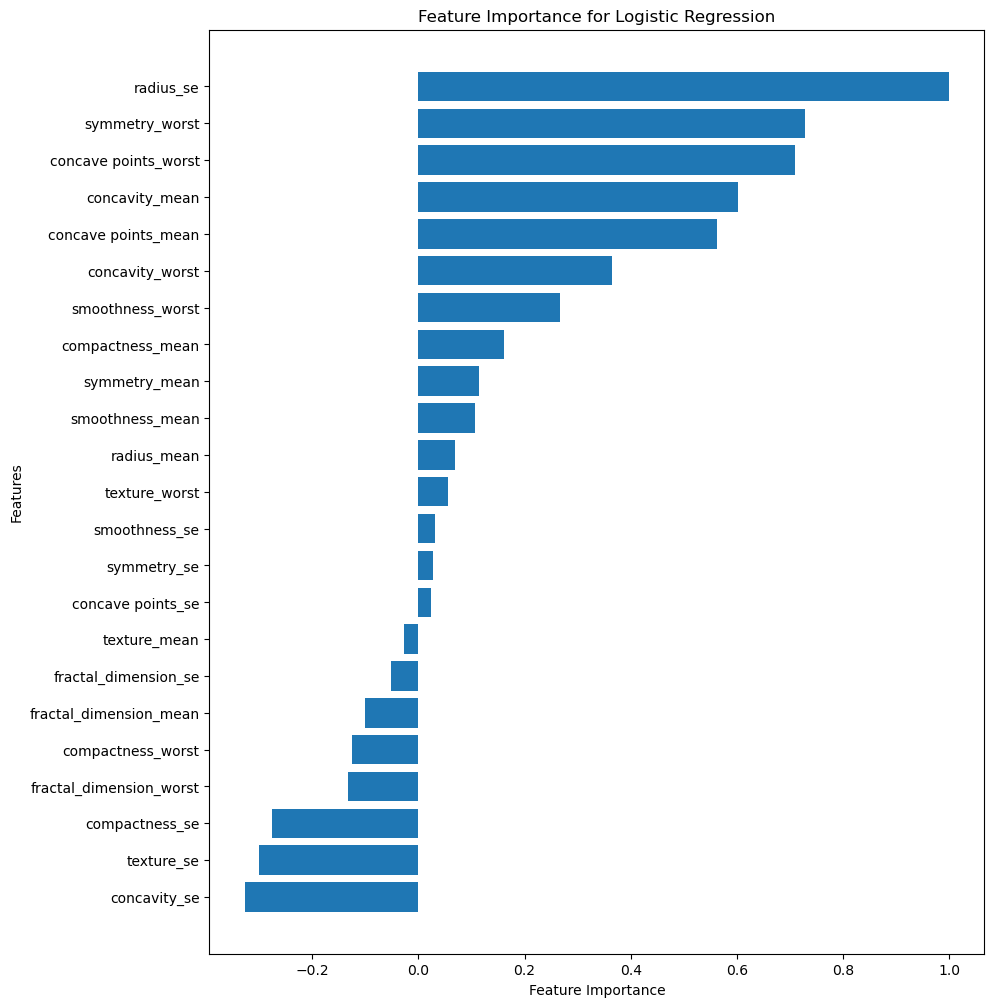

In [22]:
# get feature importance for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# get the feature importance
feature_importance = grid_search_lr.best_estimator_.coef_[0]
# normalize the feature importance
feature_importance = feature_importance / feature_importance.max()
# sort the values in descending order
sorted_idx = np.argsort(feature_importance)
# get the list of features
features = X.columns
# plot
plt.figure(figsize=(10, 12))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression')
plt.show()


Logistic: f1=0.952 auc=0.992


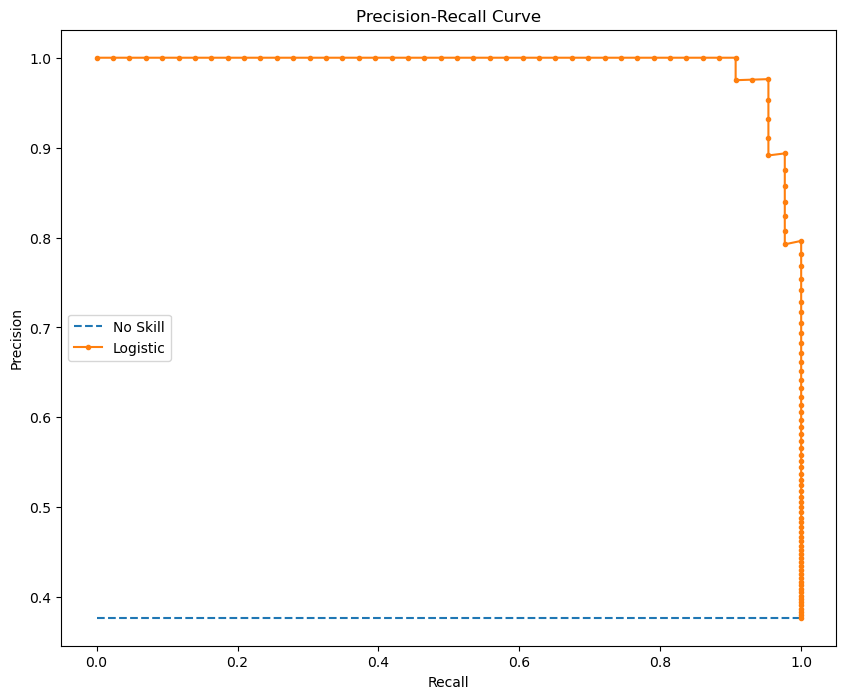

In [23]:
# threshold tuning for logistic regression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict probabilities
lr_probs = grid_search_lr.best_estimator_.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = grid_search_lr.best_estimator_.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Logistic: f1=0.943 auc=0.992


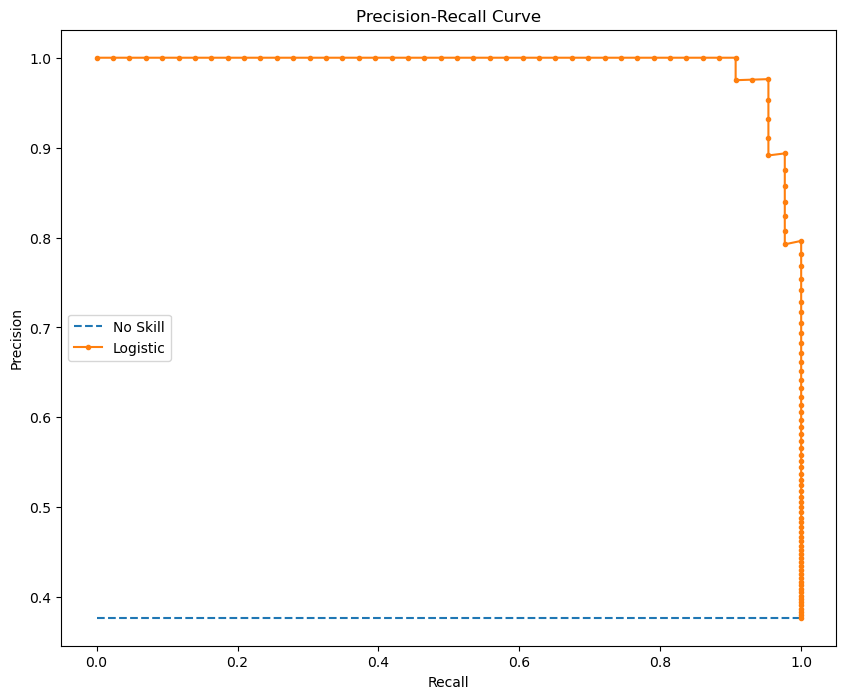

In [24]:
# minimize the false negative rate
# predict probabilities
lr_probs = grid_search_lr.best_estimator_.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = (lr_probs > 0.2).astype(int)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Logistic: f1=0.683 auc=0.915


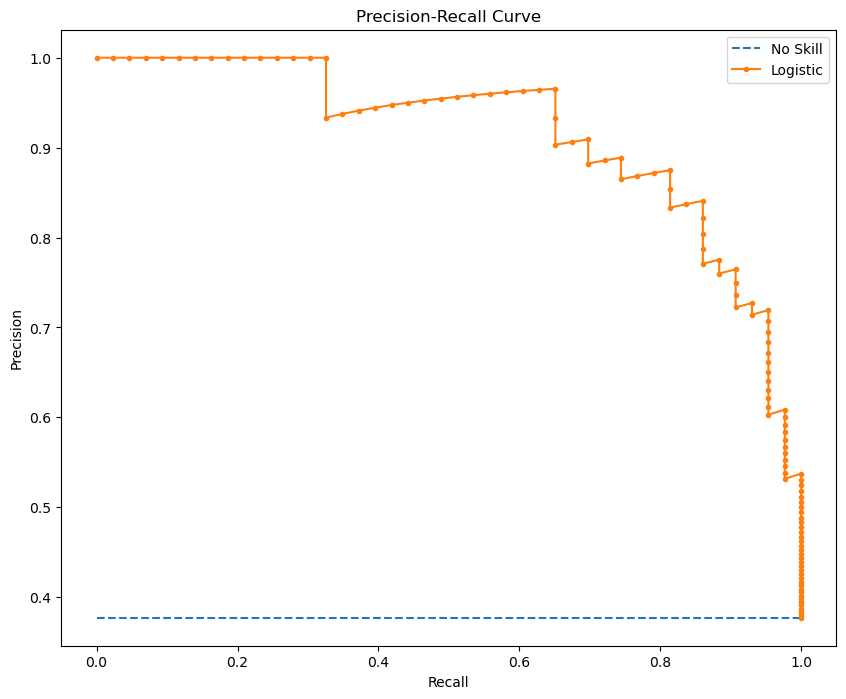

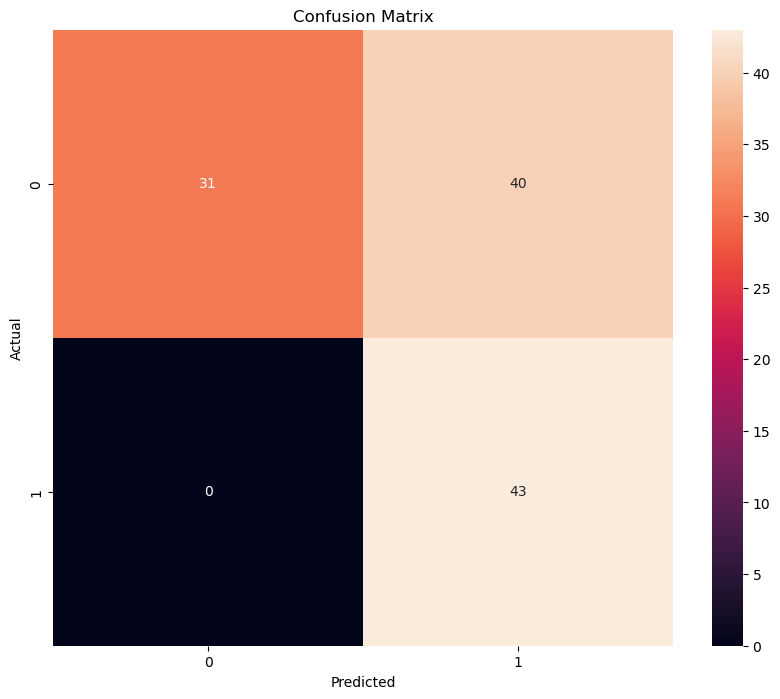

In [25]:
# retrain the model with the new threshold
# instantiate the logistic regression
lr = LogisticRegression(random_state=42, C=0.001, penalty='l2')
# train the model
lr.fit(X_train, y_train)
# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = (lr_probs > 0.2).astype(int)
# evaluate the model
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = (lr_probs > 0.2).astype(int)
# get the confusion matrix
cm = confusion_matrix(y_test, yhat)
# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
